In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### Generate Random set for clusters

In [2]:
cluster = KMeans(3,random_state = 0)
features,originalData= make_blobs(n_samples = 50, n_features =4, centers =3,random_state=1)

### Train the clusters

In [3]:
cluster.fit(features)

KMeans(n_clusters=3, random_state=0)

In [4]:
df = pd.DataFrame(features,columns = ["feature_1","feature_2","feature_3","feature_4"])
df.head()

,feature_1,feature_2,feature_3,feature_4
0,-2.760179,5.551214,-9.096122,-3.450854
1,-0.820576,5.337592,-9.712125,-3.068207
2,-8.159794,-7.983846,-5.534239,-4.042486
3,-6.218722,-9.012744,-5.924250,-4.401069
4,-1.608752,3.769494,-9.806797,-1.853093


In [5]:
df ["group"] = cluster.predict(features)

In [6]:
pd.crosstab(df["group"],originalData)

col_0,0,1,2
group,,,
0,0,17,0
1,17,0,0
2,0,0,16


In [7]:
practice = pd.read_csv("D:\\AIML\\Term 2\\Advanced Python AI and ML Tools\\Activities\\Practice_File.csv",usecols = ["LotArea","SalePrice"])
practice.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


### Define the number of clusters (Elbow Method)

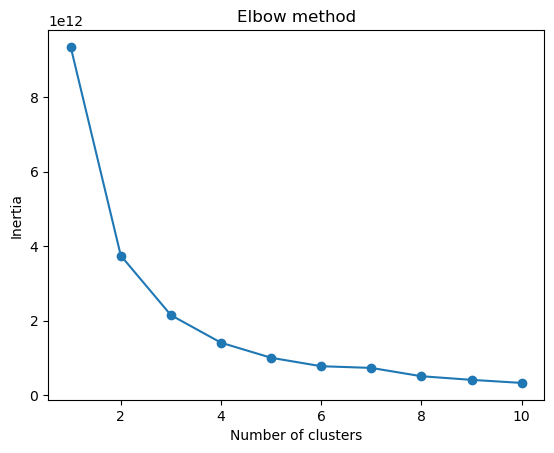

In [8]:
import matplotlib.pyplot as plt
data = list(zip(practice["LotArea"], practice["SalePrice"]))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### KNN Imputation for Missing Values

In [9]:
from sklearn.impute import KNNImputer
actual_data = [[5,4,3],[3,np.nan,8],[10,6,9]]
imputer = KNNImputer(n_neighbors =2)

In [10]:
imputer.fit_transform(actual_data)

array([[ 5.,  4.,  3.],
       [ 3.,  5.,  8.],
       [10.,  6.,  9.]])

### Using SimpleImputer

In [11]:
from sklearn.impute import SimpleImputer
actual_data = [[5,4,3],[3,np.nan,8],[10,6,9]]
data = [[np.nan,4,3],[3,np.nan,8],[10,6,np.nan]]

### Define the imputer

In [12]:
imp_mean = SimpleImputer(missing_values = np.nan)

### Train the imputer

In [13]:
imp_mean.fit(actual_data) 

SimpleImputer()

### Predict and impute the missing Values

In [14]:
print(imp_mean.transform(data)) 

[[ 6.          4.          3.        ]
 [ 3.          5.          8.        ]
 [10.          6.          6.66666667]]


### Encoding with LabelBinarizer

In [15]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit_transform(["yes","No","No","yes","Unknown"])

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [16]:
lb.classes_

array(['No', 'Unknown', 'yes'], dtype='<U7')

### Encoding with LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
encoder.fit_transform(["yes","No","No","yes","Unknown"])

array([2, 0, 0, 2, 1], dtype=int64)

In [19]:
encoder.classes_

array(['No', 'Unknown', 'yes'], dtype='<U7')

### One Hot Encoding

In [20]:
data = pd.DataFrame({"X":["a","b","a"],"Y":["B","A","C"],"Z":[1,2,3]})
data

,X,Y,Z
0,a,B,1
1,b,A,2
2,a,C,3


In [21]:
pd.get_dummies(data,prefix=["colX","colY"],dtype=float)

,Z,colX_a,colX_b,colY_A,colY_B,colY_C
0,1,1.0,0.0,0.0,1.0,0.0
1,2,0.0,1.0,1.0,0.0,0.0
2,3,1.0,0.0,0.0,0.0,1.0


### Ordinal Encoding

In [22]:
data =pd.DataFrame({"Score":["Low","Low","Medium","Medium","High","Barely More Than Medium"]})

In [23]:
scalar_mapper = {"Low":1,"Medium":2,"Barely More Than Medium":3,"High":4}

In [24]:
data["Score"].replace(scalar_mapper)

0    1
1    1
2    2
3    2
4    4
5    3
Name: Score, dtype: int64